In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [58]:
df=pd.read_csv("AIML Dataset.csv")

AED (Analisis Exploratorio de Datos)

In [59]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [61]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [62]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [63]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [64]:
#Buscamos si tenemos valores nulos en nuestros datos
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [65]:
df.shape[0]

6362620

In [66]:
#Calculamos en forma de porcentaje nuestra cantidad de valores "isfraud"
round(df["isFraud"].value_counts()[1]/df.shape[0]*100,2)

0.13

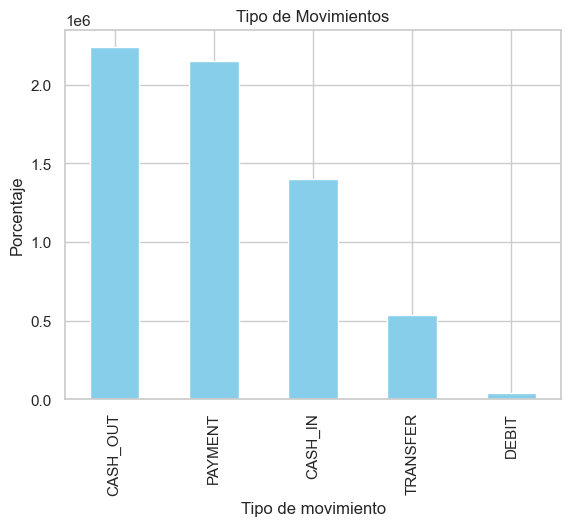

In [67]:
#Comenzamos a analizar nuestros datos importantes para la deteccion de fraude
#Comenzamos analizando el tipo de movimientos(extraccion,debito,deposito,pagos,transferencias)
df["type"].value_counts().plot(kind="bar",title="Tipo de Movimientos",color="skyblue")
plt.xlabel("Tipo de movimiento")
plt.ylabel("Porcentaje")
plt.show()
#Los movientos que mas fueron realizados:
#1. Retiro de dinero
#2.Pagos
#3.Depositos
#4.Transferencias
#5.Debito

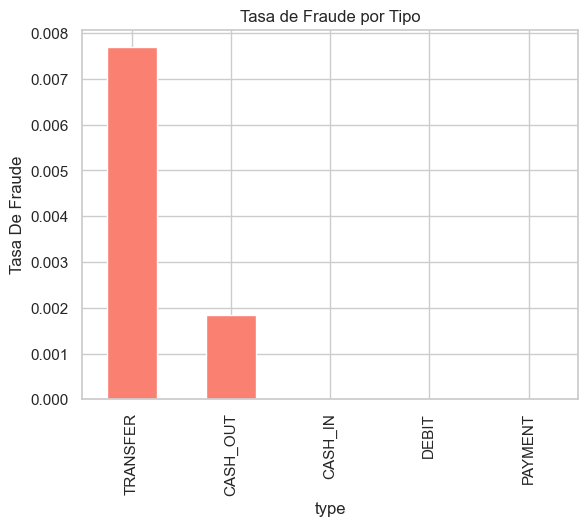

In [68]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Tasa de Fraude por Tipo",color="salmon")
plt.ylabel("Tasa De Fraude")
plt.show()

#Vemos que la tasa mas alta de fraude ocurre mediante una transferencia

In [69]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

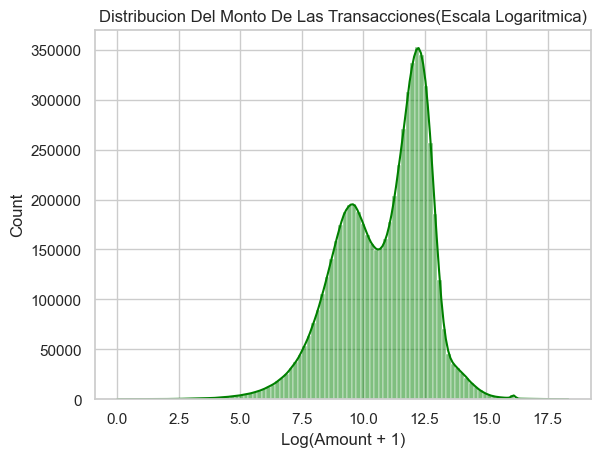

In [70]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True,color="green")
plt.title("Distribucion Del Monto De Las Transacciones(Escala Logaritmica)")
plt.xlabel("Log(Amount + 1)")
plt.show()

Text(0.5, 1.0, 'Monto vs Es Fraude (Filtrado por debajo de los 50k)')

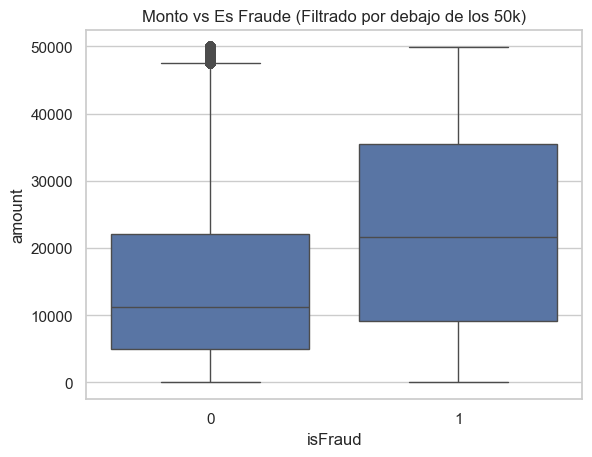

In [71]:
sns.boxplot(data=df[df["amount"]<50000],x="isFraud",y="amount")
plt.title("Monto vs Es Fraude (Filtrado por debajo de los 50k)")

In [72]:
df["balanceDiffOrig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["newbalanceDest"]-df["oldbalanceDest"]

In [73]:
(df["balanceDiffOrig"]<0).sum()

1399253

In [74]:
(df["balanceDiffDest"]<0).sum()

1238864

In [75]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


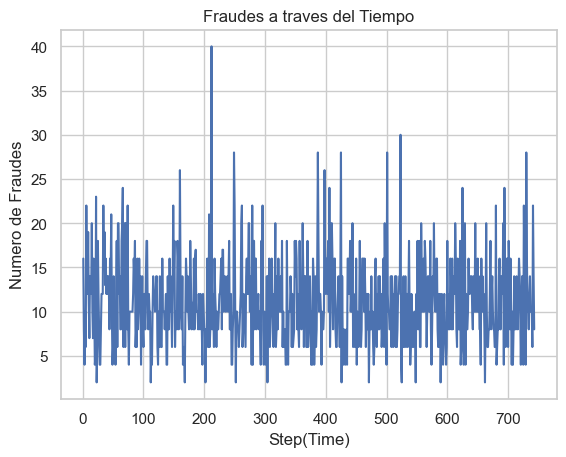

In [76]:
frauds_per_step=df[df["isFraud"]==1] ["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values,label="Frauds per Step")
plt.xlabel("Step(Time)")
plt.ylabel("Numero de Fraudes")
plt.title("Fraudes a traves del Tiempo")
plt.grid(True)
plt.show()

In [77]:
df.drop(columns="step",inplace=True)

In [78]:
df.head(2)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


In [79]:
#Buscamos los clientes que realizan mas transferencias(top 10)
top_senders=df["nameOrig"].value_counts().head(10)

In [80]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [81]:
#Ahora buscampos los clientes que reciben mas transferencias(top 10)
top_recivers=df["nameDest"].value_counts().head(10)

In [82]:
top_recivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [83]:
#Top 10 usuarios que mas veces han iniciado transacciones fraudulentas
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [84]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [85]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [86]:
#Anteriormente vimos que los tipos de fraudes mas comunes son transferencias y retiro de dinero(cash_out)
#Analicemos estos datos

fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]


In [87]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

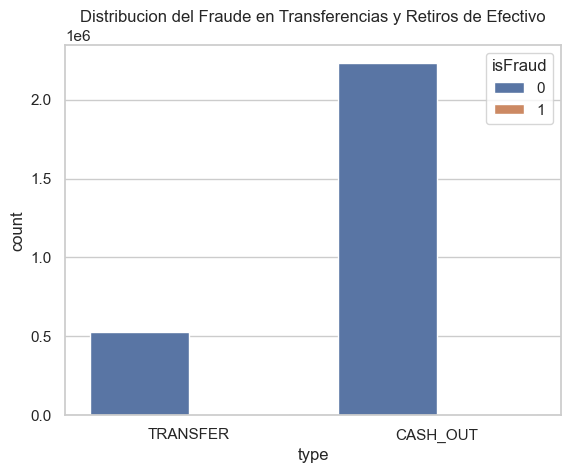

In [88]:
sns.countplot(data=fraud_types,x="type",hue="isFraud")
plt.title("Distribucion del Fraude en Transferencias y Retiros de Efectivo")
plt.show()

In [89]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [90]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


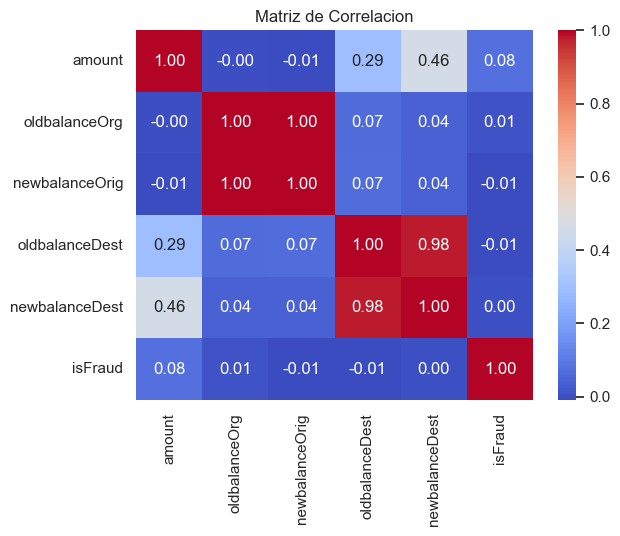

In [91]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Matriz de Correlacion")
plt.show()

In [92]:
#Averiguemos cuantos clientes luego de realizar una transferencia su balance es 0
zero_after_transfer=df[
    (df["oldbalanceOrg"]>0)&
    (df["newbalanceOrig"]==0)&
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [93]:
#Utilizamos len para averiguar la cantidad
len(zero_after_transfer)

1188074

In [94]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


INGENIERÍA DE CARACTERÍSTICAS Y ENTRENAMIENTO DE UN MODELO DE APRENDIZAJE

In [95]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [97]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [98]:
#Creamos un nuevo data frame y eliminamos las columnas irrelevantes
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [99]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [100]:
categorical=["type"]
numeric=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [101]:
y=df_model["isFraud"]
X=df_model.drop("isFraud",axis=1)

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)
#Dividimos nuestros datos en conjunto de entrenamiento (70%) y conjunto de prueba (30%)

In [103]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numeric),
        ("cat",OneHotEncoder(drop="first"),categorical)
    ],
    remainder="drop"
)
#Creamos un preprocesador combinado 

In [104]:
pipeline=Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
])
#Creamos un pipeline de pasos encadenados:
#prep aliga el preprocesador definido antes 
#cls entrena un modelo de regresion logistica
#max_inter=1000 permite hasta 1000 interaciones para asegurar que el modelo converja

In [105]:
pipeline.fit(X_train,y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Prediccion con el modelo

In [106]:
#Usa el pipeline entrenado(cuando utilizamos .fit)
#Aplica el preprocesamiento y luego hace predicciones 
# sobre el conjunto de prueba x_test
y_pred=pipeline.predict(X_test)



Reporte de clasificacion


In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [108]:
confusion_matrix(y_test,y_pred)

array([[1803113,  103209],
       [    129,    2335]], dtype=int64)

In [109]:
pipeline.score(X_test,y_test)*100

94.58619248045616

In [110]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']